In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

## Load dataset

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [3]:
partial_steps = 50

In [4]:
X_partial = X[::partial_steps]
X_partial.shape

(1400, 784)

In [5]:
y_partial = np.array([int(y) for y in y[::partial_steps]])
y_partial.shape

(1400,)

Chaque observation de ce jeu de données est une image de 28 pixels par 28 pixels, dont l’étiquette y[i] est le chiffre qu’elle représente, et les 784 features le niveau de gris (entre 0 et 255) du pixel correspondant (car 28 x 28 = 784)

## Display demo image

Text(0.5, 1.0, 'Value: 0')

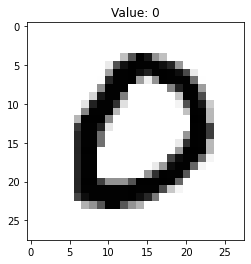

In [6]:
sample_idx = 42
sample_image = np.reshape(X_partial[sample_idx, :], (28, 28))
plt.imshow(sample_image, cmap='binary')
plt.title(f"Value: {y_partial[sample_idx]}")

## Feature Scaling

In [7]:
std_scale = preprocessing.StandardScaler().fit(X_partial)
X_scaled = std_scale.transform(X_partial)

## 1/ Clustering

effectuer un partitionnement de X en 10 clusters, avec l’algorithme de clustering de votre choix

In [8]:
from sklearn import cluster
#from scipy.cluster.hierarchy import linkage

In [9]:
def do_hierarchical_clustering(data, n_clusters):
    hc = cluster.AgglomerativeClustering(linkage='ward', n_clusters=n_clusters)
    hc.fit(data)
    return hc.labels_
    # return linkage(data, 'ward') # scipy

In [10]:
def do_kmeans_clustering(data, n_clusters):
    km = cluster.KMeans(n_clusters=n_clusters)
    km.fit(data)
    return km.labels_

In [11]:
def do_dbscan_clustering(data):
    dbscan = cluster.DBSCAN(eps=15, min_samples=2)
    dbscan.fit(data)
    return dbscan.labels_

In [55]:
#clusters = do_hierarchical_clustering(X_scaled, 10)
clusters = do_kmeans_clustering(X_partial, 10)
#clusters = do_dbscan_clustering(X_scaled)

In [56]:
clusters

array([6, 2, 6, ..., 7, 6, 5], dtype=int32)

## 2/ Visualize

visualiser le résultat de ce clustering en deux dimensions

#### Dimentionality Reduction (t-SNE)

In [51]:
from sklearn import manifold
#tsne = manifold.TSNE(n_components=2, init='pca') #, random_state=0)
tsne = manifold.TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300)

In [52]:
X_projected_tnse = tsne.fit_transform(X_scaled)

#### Plotting

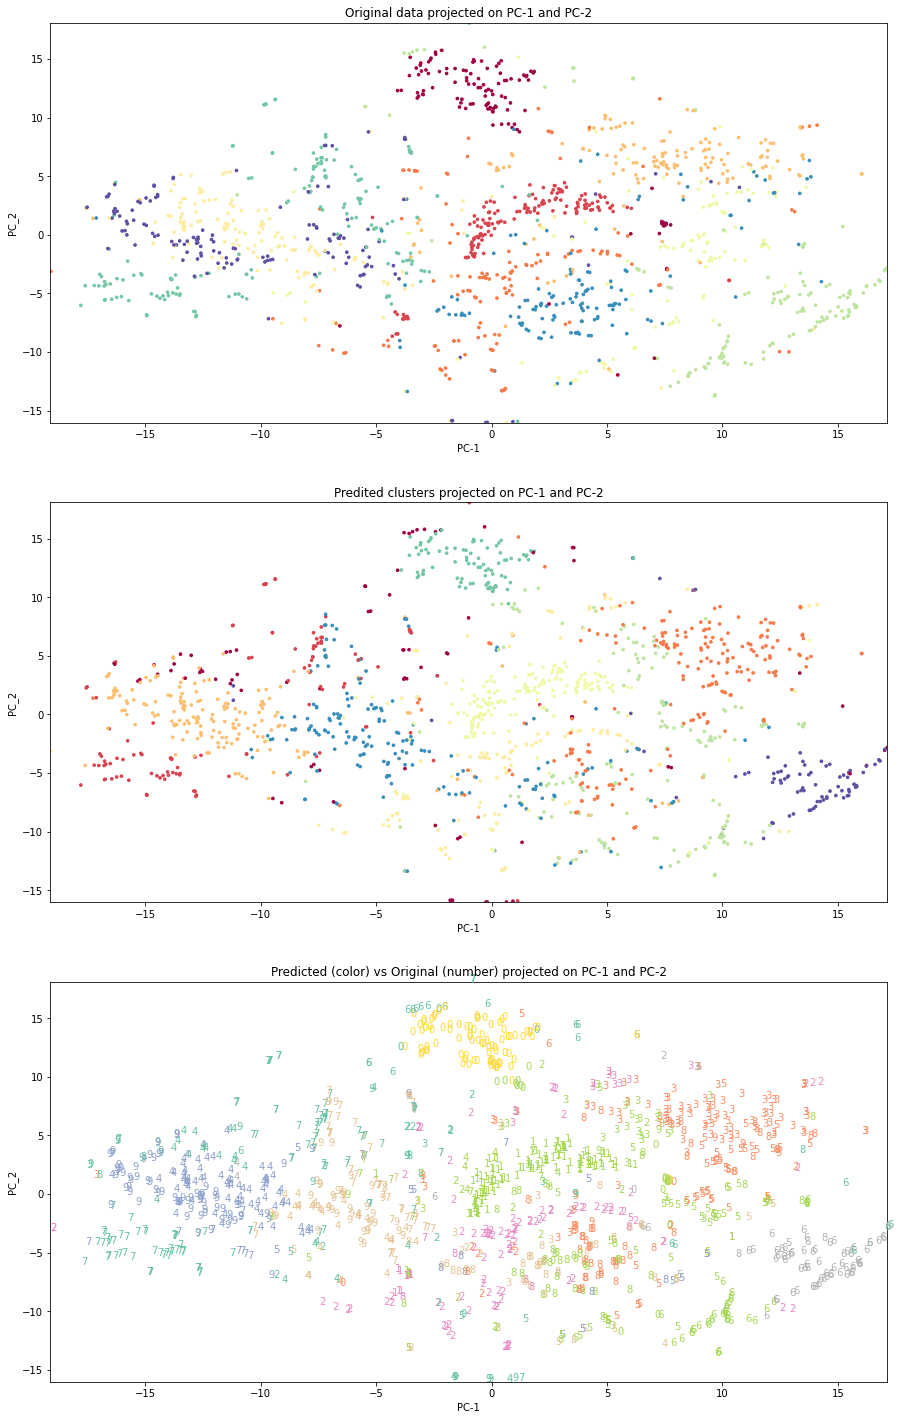

In [57]:
fig = plt.figure(figsize=(15,25))

#ax = fig.add_subplot(131, projection='3d')
#ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
#ax.set_title("Original data")
#ax.set_xlabel("X")
#ax.set_ylabel("Y")
#ax.set_zlabel("Z")

ax = fig.add_subplot(311)
ax.scatter(X_projected_tnse[:, 0], X_projected_tnse[:, 1], s=7, c=y_partial , cmap=plt.cm.Spectral)
#plt.xticks([]), plt.yticks([])
plt.title("Original data projected on PC-1 and PC-2")
ax.set_xlabel("PC-1")
ax.set_ylabel("PC_2")
plt.xlim([np.min(X_projected_tnse[:, 0]), np.max(X_projected_tnse[:, 0])])
plt.ylim([np.min(X_projected_tnse[:, 1]), np.max(X_projected_tnse[:, 1])])


ax = fig.add_subplot(312)
ax.scatter(X_projected_tnse[:, 0], X_projected_tnse[:, 1], s=7, c=clusters , cmap=plt.cm.Spectral)
#plt.xticks([]), plt.yticks([])
plt.title("Predited clusters projected on PC-1 and PC-2")
ax.set_xlabel("PC-1")
ax.set_ylabel("PC_2")
plt.xlim([np.min(X_projected_tnse[:, 0]), np.max(X_projected_tnse[:, 0])])
plt.ylim([np.min(X_projected_tnse[:, 1]), np.max(X_projected_tnse[:, 1])])


ax = fig.add_subplot(313)
#ax.scatter(X_projected_tnse[:, 0], X_projected_tnse[:, 1], c=clusters , cmap=plt.cm.Spectral)
for i,c in enumerate(clusters):
    ax.text(X_projected_tnse[i,0], X_projected_tnse[i,1], y_partial[i], color=plt.cm.Set2(clusters[i]/10.))

#plt.xticks([]), plt.yticks([])
plt.title("Predicted (color) vs Original (number) projected on PC-1 and PC-2")
ax.set_xlabel("PC-1")
ax.set_ylabel("PC_2")
plt.xlim([np.min(X_projected_tnse[:, 0]), np.max(X_projected_tnse[:, 0])])
plt.ylim([np.min(X_projected_tnse[:, 1]), np.max(X_projected_tnse[:, 1])])


#ax = fig.add_subplot(313, projection='3d')
#ax.scatter(X_projected_tnse[:, 0], X_projected_tnse[:, 1], X_projected_tnse[:, 2], c=y_partial, cmap=plt.cm.Spectral)
#ax.set_title("Original data")
#ax.set_xlabel("X")
#ax.set_ylabel("Y")
#ax.set_zlabel("Z")


plt.show()

## 3/ Evaluate

évaluer la qualité de ce partitionnement:
- d’une part intrinsèquement (sans utiliser y)
- et d’autre part en le comparant aux chiffres représentés par les images (en utilisant y).

In [58]:
from sklearn import metrics

# Pour l’évaluation intrinsèque, je choisis le coefficient de silhouette :
print(f"Silhouette Coefficient: {metrics.silhouette_score(X_partial, clusters):0.03f}")

# Pour la comparaison aux étiquettes, je choisis l’indice de Rand ajusté :
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y_partial, clusters):0.03f}")

Silhouette Coefficient: 0.060
Adjusted Rand Index: 0.375
